In [200]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') # ignore warnings message

# making all pandas columns visable with display command
pd.set_option('display.max_columns', 500)


df = pd.read_csv('datasets/EPL_sort.csv', index_col=0)
# df = df.drop(columns = ['id', 'season', 'stage', 'date', 'match_api_id'])
df = df.drop(columns = ['id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id'])
df

,home_team_goal,away_team_goal,B365H,B365D,B365A,home_y_card,home_r_card,away_y_card,away_r_card,home_foulcommit,away_foulcommit,home_shoton,away_shoton,home_shotoff,away_shotoff,home_cross,away_cross,home_corner,away_corner,home_possession,away_possession,HTP,ATP,Result
1,1,0,1.20,6.50,15.00,0,0,0,0,11,9,12,2,13,3,21,7,7,5,66,34,0,0,H
7,3,1,1.83,3.50,4.50,1,0,2,0,14,15,5,1,7,6,22,29,4,3,47,53,0,0,H
5,2,3,2.00,3.30,4.00,2,0,2,0,11,11,2,8,7,8,14,21,3,4,51,49,0,0,A
8,2,1,2.60,3.20,2.80,3,0,0,0,10,9,5,4,5,6,16,14,5,6,53,47,0,0,H
6,2,1,3.20,3.40,2.25,1,0,2,0,11,11,7,2,5,5,25,27,7,9,53,47,0,0,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,2,1,3.50,3.60,2.15,3,0,1,0,8,12,3,10,2,7,13,18,4,10,45,55,48,62,H
2977,1,1,6.00,4.75,1.53,1,0,3,0,5,19,1,5,2,12,14,15,4,4,50,50,46,65,D
2978,2,2,2.05,3.75,3.70,1,0,0,0,10,9,6,2,10,2,9,12,7,4,49,51,44,38,D
2979,1,1,2.40,3.60,3.00,3,0,1,0,12,13,5,3,8,3,12,14,7,5,33,67,42,59,D


In [201]:
# Pre-processing before get the correlation value
df.Result.replace(to_replace='H', value = 0, inplace = True)
df.Result.replace(to_replace='D', value = 1, inplace = True)
df.Result.replace(to_replace='A', value = 2, inplace = True)
# df.isnull().sum()

# df_dummies = pd.get_dummies(df)
# df_dummies.head()
df

,home_team_goal,away_team_goal,B365H,B365D,B365A,home_y_card,home_r_card,away_y_card,away_r_card,home_foulcommit,away_foulcommit,home_shoton,away_shoton,home_shotoff,away_shotoff,home_cross,away_cross,home_corner,away_corner,home_possession,away_possession,HTP,ATP,Result
1,1,0,1.20,6.50,15.00,0,0,0,0,11,9,12,2,13,3,21,7,7,5,66,34,0,0,0
7,3,1,1.83,3.50,4.50,1,0,2,0,14,15,5,1,7,6,22,29,4,3,47,53,0,0,0
5,2,3,2.00,3.30,4.00,2,0,2,0,11,11,2,8,7,8,14,21,3,4,51,49,0,0,2
8,2,1,2.60,3.20,2.80,3,0,0,0,10,9,5,4,5,6,16,14,5,6,53,47,0,0,0
6,2,1,3.20,3.40,2.25,1,0,2,0,11,11,7,2,5,5,25,27,7,9,53,47,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,2,1,3.50,3.60,2.15,3,0,1,0,8,12,3,10,2,7,13,18,4,10,45,55,48,62,0
2977,1,1,6.00,4.75,1.53,1,0,3,0,5,19,1,5,2,12,14,15,4,4,50,50,46,65,1
2978,2,2,2.05,3.75,3.70,1,0,0,0,10,9,6,2,10,2,9,12,7,4,49,51,44,38,1
2979,1,1,2.40,3.60,3.00,3,0,1,0,12,13,5,3,8,3,12,14,7,5,33,67,42,59,1


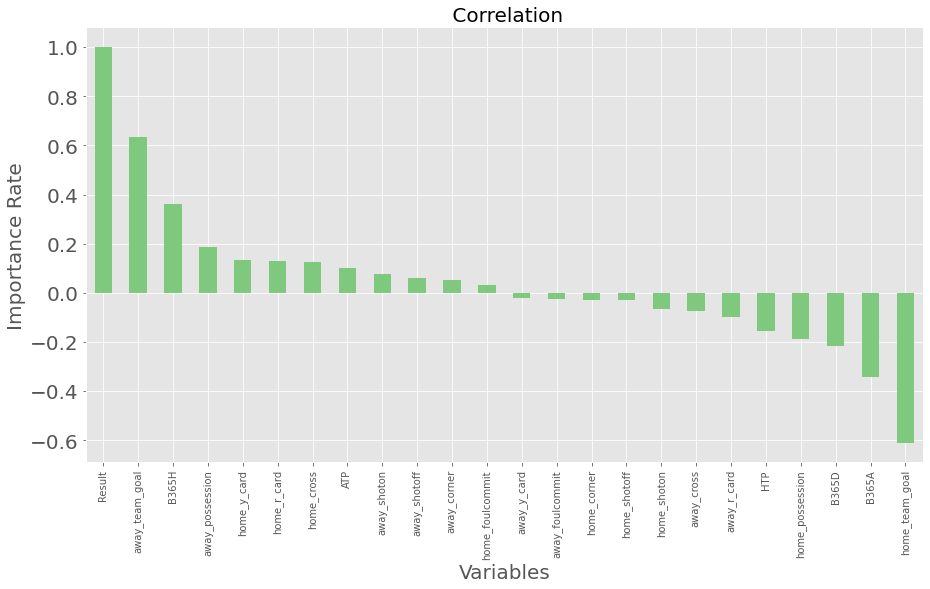

Most Positive Correlations: 
 Result             1.000000
away_team_goal     0.635066
B365H              0.361132
away_possession    0.187672
home_y_card        0.134933
Name: Result, dtype: float64

Most Negative Correlations: 
 HTP               -0.153729
home_possession   -0.187672
B365D             -0.215422
B365A             -0.343301
home_team_goal    -0.608997
Name: Result, dtype: float64


In [202]:
#VISUALISATION
import matplotlib.pyplot as plt
#df_dum.corr()['is_promoted'].sort_values(ascending = False).plot(kind='bar')
import matplotlib.cm as cm
plt.figure(figsize=(15,8))
plt.style.use('ggplot')
my_cmap = cm.get_cmap('Accent')

correlations = df.corr()['Result'].sort_values(ascending = False)
correlations.plot(kind='bar', cmap=my_cmap)

plt.title(' Correlation',fontsize=20)
plt.xlabel('Variables', fontsize=20)
plt.ylabel('Importance Rate',fontsize=20)

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show() 

print('Most Positive Correlations: \n', correlations.head(5))
print('\nMost Negative Correlations: \n', correlations.tail(5))

## Predict

### Split data train an test

In [203]:
# X = df[['B365H', 'B365D', 'B365A','HTP', 'ATP']]
X = df[['away_team_goal', 'B365H', 'away_possession','home_y_card']] # using top 5 highest features 
# X = df[['away_team_goal', 'B365H', 'away_possession','home_y_card','home_r_card', 'home_cross']]
y = df['Result']

In [204]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
columns = X_train.values.shape[1]
columns

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (2280, 4)
Train labels shape:  (2280,)
Test data shape:  (760, 4)
Test labels shape:  (760,)


### DECISION TREE

In [205]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import metrics

modelDT = DT()
modelDT = modelDT.fit(X_train, y_train)
preds_DT = modelDT.predict(X_test)
print('Accuracy of DecisionTreeClassifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, preds_DT)))
print('Logistic Regression Confusion Matrix \n', metrics.confusion_matrix(y_test, preds_DT))

Accuracy of DecisionTreeClassifier on test set: 0.57
Logistic Regression Confusion Matrix 
 [[230  83  34]
 [103  66  50]
 [ 22  34 138]]


### Logistic Regression

In [206]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn import metrics

model_LR = LR(random_state=0)
# model_LR = model_LR.fit(X_train, y_train)
# pred_LR = model_LR.predict(X_test)

# print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, pred_LR)))
# print('Recall of Logistic Regression classifier on test set: {:.2f}'.format(metrics.recall_score(y_test, pred_LR)))
# print('Precision of Logistic Regression classifier on test set: {:.2f}'.format(metrics.precision_score(y_test, pred_LR)))
# print('F1-Score of Logistic Regression classifier on test set: {:.2f}'.format(metrics.f1_score(y_test, pred_LR)))
# print('AUC Score of Logistic Regression classifier on test set: {:.2f}'.format(metrics.roc_auc_score(y_test, pred_LR)))
# print('Logistic Regression Confusion Matrix = \n', metrics.confusion_matrix(y_test, pred_LR))

model_LR = model_LR.fit(X_train, y_train)
pred_LR = model_LR.predict(X_test)

print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, pred_LR)))
print('Logistic Regression Confusion Matrix \n', metrics.confusion_matrix(y_test, pred_LR))

Accuracy of Logistic Regression classifier on test set: 0.62
Logistic Regression Confusion Matrix 
 [[295  14  38]
 [133  17  69]
 [ 24  12 158]]


### XGB Classifier

In [207]:
from xgboost import XGBClassifier

# get an instance from the clf
model_XGB = XGBClassifier()

# fit data
model_XGB.fit(X_train, y_train)

# predict unseen data
pred_XGB = model_XGB.predict(X_test)

print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, pred_XGB)))
print('XGBoost - Confusion Matrix \n', metrics.confusion_matrix(y_test, pred_XGB))

Accuracy of XGBoost classifier on test set: 0.61
XGBoost - Confusion Matrix 
 [[270  43  34]
 [121  48  50]
 [ 28  23 143]]


### KERAS

In [208]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# We first need to define the sequence of dependencies (the computational graph)
x = Input(shape=(columns,))
# h = Conv2D(32, (7, 7), strides=(2, 2))(x)
# h = Activation('relu')(x)
# h = Flatten()(h)
h = Dense(16)(x)
p = Activation('softmax')(h)

# Now that we have defined how to find p from x, we can create a 
# model simply by saying what is input and what is output
model = Model(inputs=x, outputs=p)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.00001), metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 4)                 0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)                80        
_________________________________________________________________
activation_26 (Activation)   (None, 16)                0         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [209]:
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.04)

Train on 2188 samples, validate on 92 samples
Epoch 1/50
2188/2188 [==============================] - 1s 260us/sample - loss: 14.3512 - acc: 0.0000e+00 - val_loss: 14.5828 - val_acc: 0.0000e+00
Epoch 2/50
2188/2188 [==============================] - 0s 44us/sample - loss: 14.3363 - acc: 0.0000e+00 - val_loss: 14.5710 - val_acc: 0.0000e+00
Epoch 3/50
2188/2188 [==============================] - 0s 44us/sample - loss: 14.3213 - acc: 0.0000e+00 - val_loss: 14.5593 - val_acc: 0.0000e+00
Epoch 4/50
2188/2188 [==============================] - 0s 42us/sample - loss: 14.3061 - acc: 0.0000e+00 - val_loss: 14.5475 - val_acc: 0.0000e+00
Epoch 5/50
2188/2188 [==============================] - 0s 36us/sample - loss: 14.2911 - acc: 0.0000e+00 - val_loss: 14.5357 - val_acc: 0.0000e+00
Epoch 6/50
2188/2188 [==============================] - 0s 38us/sample - loss: 14.2759 - acc: 0.0000e+00 - val_loss: 14.5239 - val_acc: 0.0000e+00
Epoch 7/50
2188/2188 [==============================] - 0s 41us/sample 